# Content
- create correlation heatmap using seaborn
- scatterplot
- pair plot
- categorial plot
- Questions answered
- hypothesis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [19]:
from random import sample

In [2]:
# import data
path = r'/Users/lennartzeidler/Desktop/Uni/(6) Advances Analytics and Dashboard Design/liquid store sales analysis'
df_sales = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_liquid_sales_clean.pkl'))

In [3]:
df_sales.head()

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
6,S28865700001,11/09/2015,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,$11.62,$17.43,6,$104.58,9.0,2.38
8,S29339300091,11/30/2015,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,$19.58,$29.37,4,$117.48,3.0,0.79
13,S28866900001,11/11/2015,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,$11.62,$17.43,1,$17.43,1.5,0.40
18,S29134300126,11/18/2015,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",Monona,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,$99.00,$148.50,1,$148.50,6.0,1.59
21,S29282800048,11/23/2015,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",Marion,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,$11.62,$17.43,6,$104.58,9.0,2.38


In [4]:
# This option ensures the charts I create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
df_sales.dtypes

Invoice/Item Number       object
Date                      object
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County                    object
Category Name             object
Vendor Name               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
df_sales.corr()

,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
Pack,1.000000,-0.417644,0.079542,-0.060579,-0.060513
Bottle Volume (ml),-0.417644,1.000000,-0.004065,0.107433,0.107359
Bottles Sold,0.079542,-0.004065,1.000000,0.910737,0.910777
Volume Sold (Liters),-0.060579,0.107433,0.910737,1.000000,1.000000
Volume Sold (Gallons),-0.060513,0.107359,0.910777,1.000000,1.000000


In [10]:
# doing some changes to involve prices
# removing dollar sign from columns rows
df_sales["State Bottle Cost"] = df_sales["State Bottle Cost"].str.replace("$","")
df_sales["State Bottle Retail"] = df_sales["State Bottle Retail"].str.replace("$","")
df_sales["Sale (Dollars)"] = df_sales["Sale (Dollars)"].str.replace("$","")

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_72431/796901213.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sales["State Bottle Cost"] = df_sales["State Bottle Cost"].str.replace("$","")
/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_72431/796901213.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_sales["State Bottle Retail"] = df_sales["State Bottle Retail"].str.replace("$","")
/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_72431/796901213.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal stri

In [11]:
df_sales.head()

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
6,S28865700001,11/09/2015,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.0,2.38
8,S29339300091,11/30/2015,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,4,117.48,3.0,0.79
13,S28866900001,11/11/2015,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,1,17.43,1.5,0.40
18,S29134300126,11/18/2015,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",Monona,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,99.00,148.50,1,148.50,6.0,1.59
21,S29282800048,11/23/2015,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",Marion,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.0,2.38


In [12]:
df_sales = df_sales.astype({'State Bottle Cost':'float64', 'State Bottle Retail':'float64', 'Sale (Dollars)':'float64'})

In [13]:
df_sales.corr()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Pack,1.000000,-0.417644,-0.225866,-0.226414,0.079542,-0.044585,-0.060579,-0.060513
Bottle Volume (ml),-0.417644,1.000000,0.510050,0.510515,-0.004065,0.061199,0.107433,0.107359
State Bottle Cost,-0.225866,0.510050,1.000000,0.999964,-0.030373,0.102923,0.016019,0.015998
State Bottle Retail,-0.226414,0.510515,0.999964,1.000000,-0.030274,0.103031,0.016287,0.016266
Bottles Sold,0.079542,-0.004065,-0.030373,-0.030274,1.000000,0.850257,0.910737,0.910777
Sale (Dollars),-0.044585,0.061199,0.102923,0.103031,0.850257,1.000000,0.836477,0.836471
Volume Sold (Liters),-0.060579,0.107433,0.016019,0.016287,0.910737,0.836477,1.000000,1.000000
Volume Sold (Gallons),-0.060513,0.107359,0.015998,0.016266,0.910777,0.836471,1.000000,1.000000


We already can see some prety high values, wich can become interesting.

In [15]:
# export new df
df_sales.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'liquid_sales_PriceAsINT_clean.pkl'))

### create correlation heatmap using seaborn

In [16]:
# creating subset with usable columns
sub = df_sales[['Pack',	'Bottle Volume (ml)', 'State Bottle Cost',	'State Bottle Retail',	'Bottles Sold',	'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']]
sub.head()

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
6,6,1500,11.62,17.43,6,104.58,9.0,2.38
8,12,750,19.58,29.37,4,117.48,3.0,0.79
13,6,1500,11.62,17.43,1,17.43,1.5,0.40
18,1,6000,99.00,148.50,1,148.50,6.0,1.59
21,6,1500,11.62,17.43,6,104.58,9.0,2.38


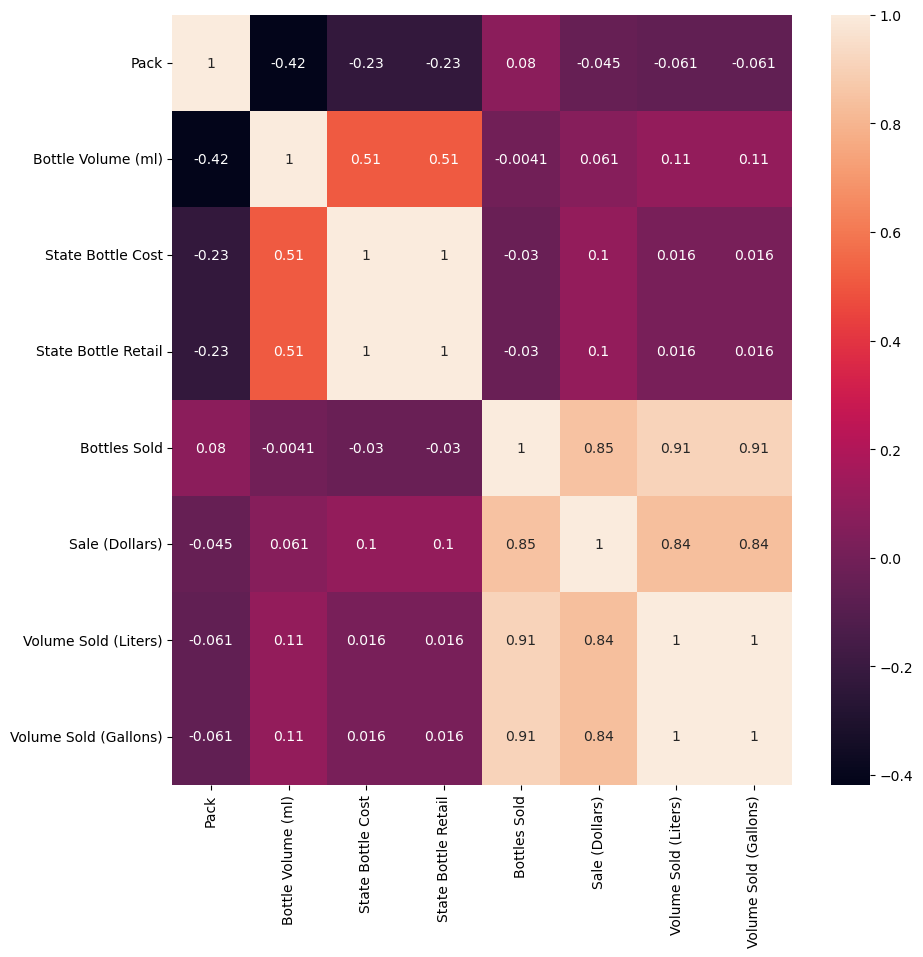

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

Following relations ships are from biggest interest:
- State Bottle Cost <==> State Bottle Retail [strong correlation]
- Bottles Sold <==> Volume Sold (Liters) [strong correlation]
- Sale (Dollars) <==> Volumne Sold (Liters) [strong correlation]  

Not really surprising is the relationship between:  
- Volumne Sold (Liters) <==> Volumne Sold (Gallons)
since one is calculated out of the second one

### scatterplot
State Bottle Retail and State Bottle Cost-count correlation

In [23]:
#create random sample
sub_sample = sub.sample(n=500000, random_state=1)

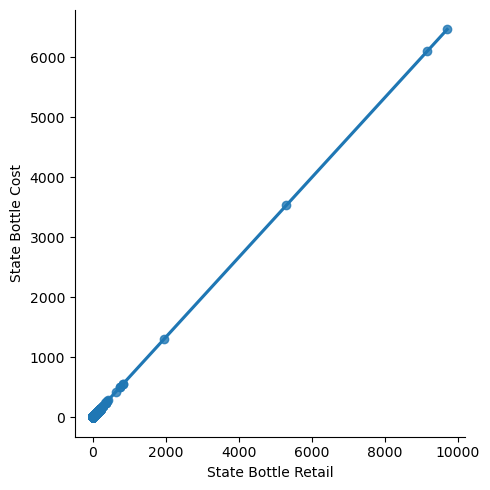

In [30]:
# creating scatterplot and saving it in a variable
retailXcost = sns.lmplot(x = 'State Bottle Retail', y = 'State Bottle Cost', data = sub_sample)

In [25]:
# since I want a better view on the smal values I create a subset containing bottle sales with State Bottle cost less than 300
sub_sub_sample = sub_sample[sub_sample['State Bottle Retail'] < 300]

In [27]:
sub_sub_sample.shape

(499984, 8)

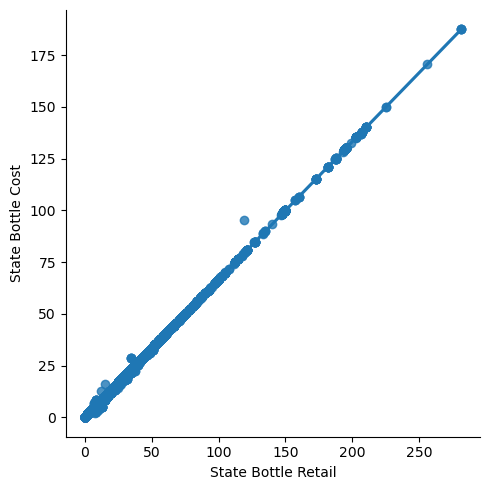

In [31]:
# creating another scatterplot with sub sub set
retailXcost_sub = sns.lmplot(x = 'State Bottle Retail', y = 'State Bottle Cost', data = sub_sub_sample)

The results are clear, we have strong relationship between the State Bottle Cost and State Bottle Retail. Knowing that we can forcast the State Bottle Cost based on the State Bottle Retail, or the other way around, with areally high precission. There are only some values falling out of the cheme. It might be interesting to further analyse them.

### pair plot
using the sample

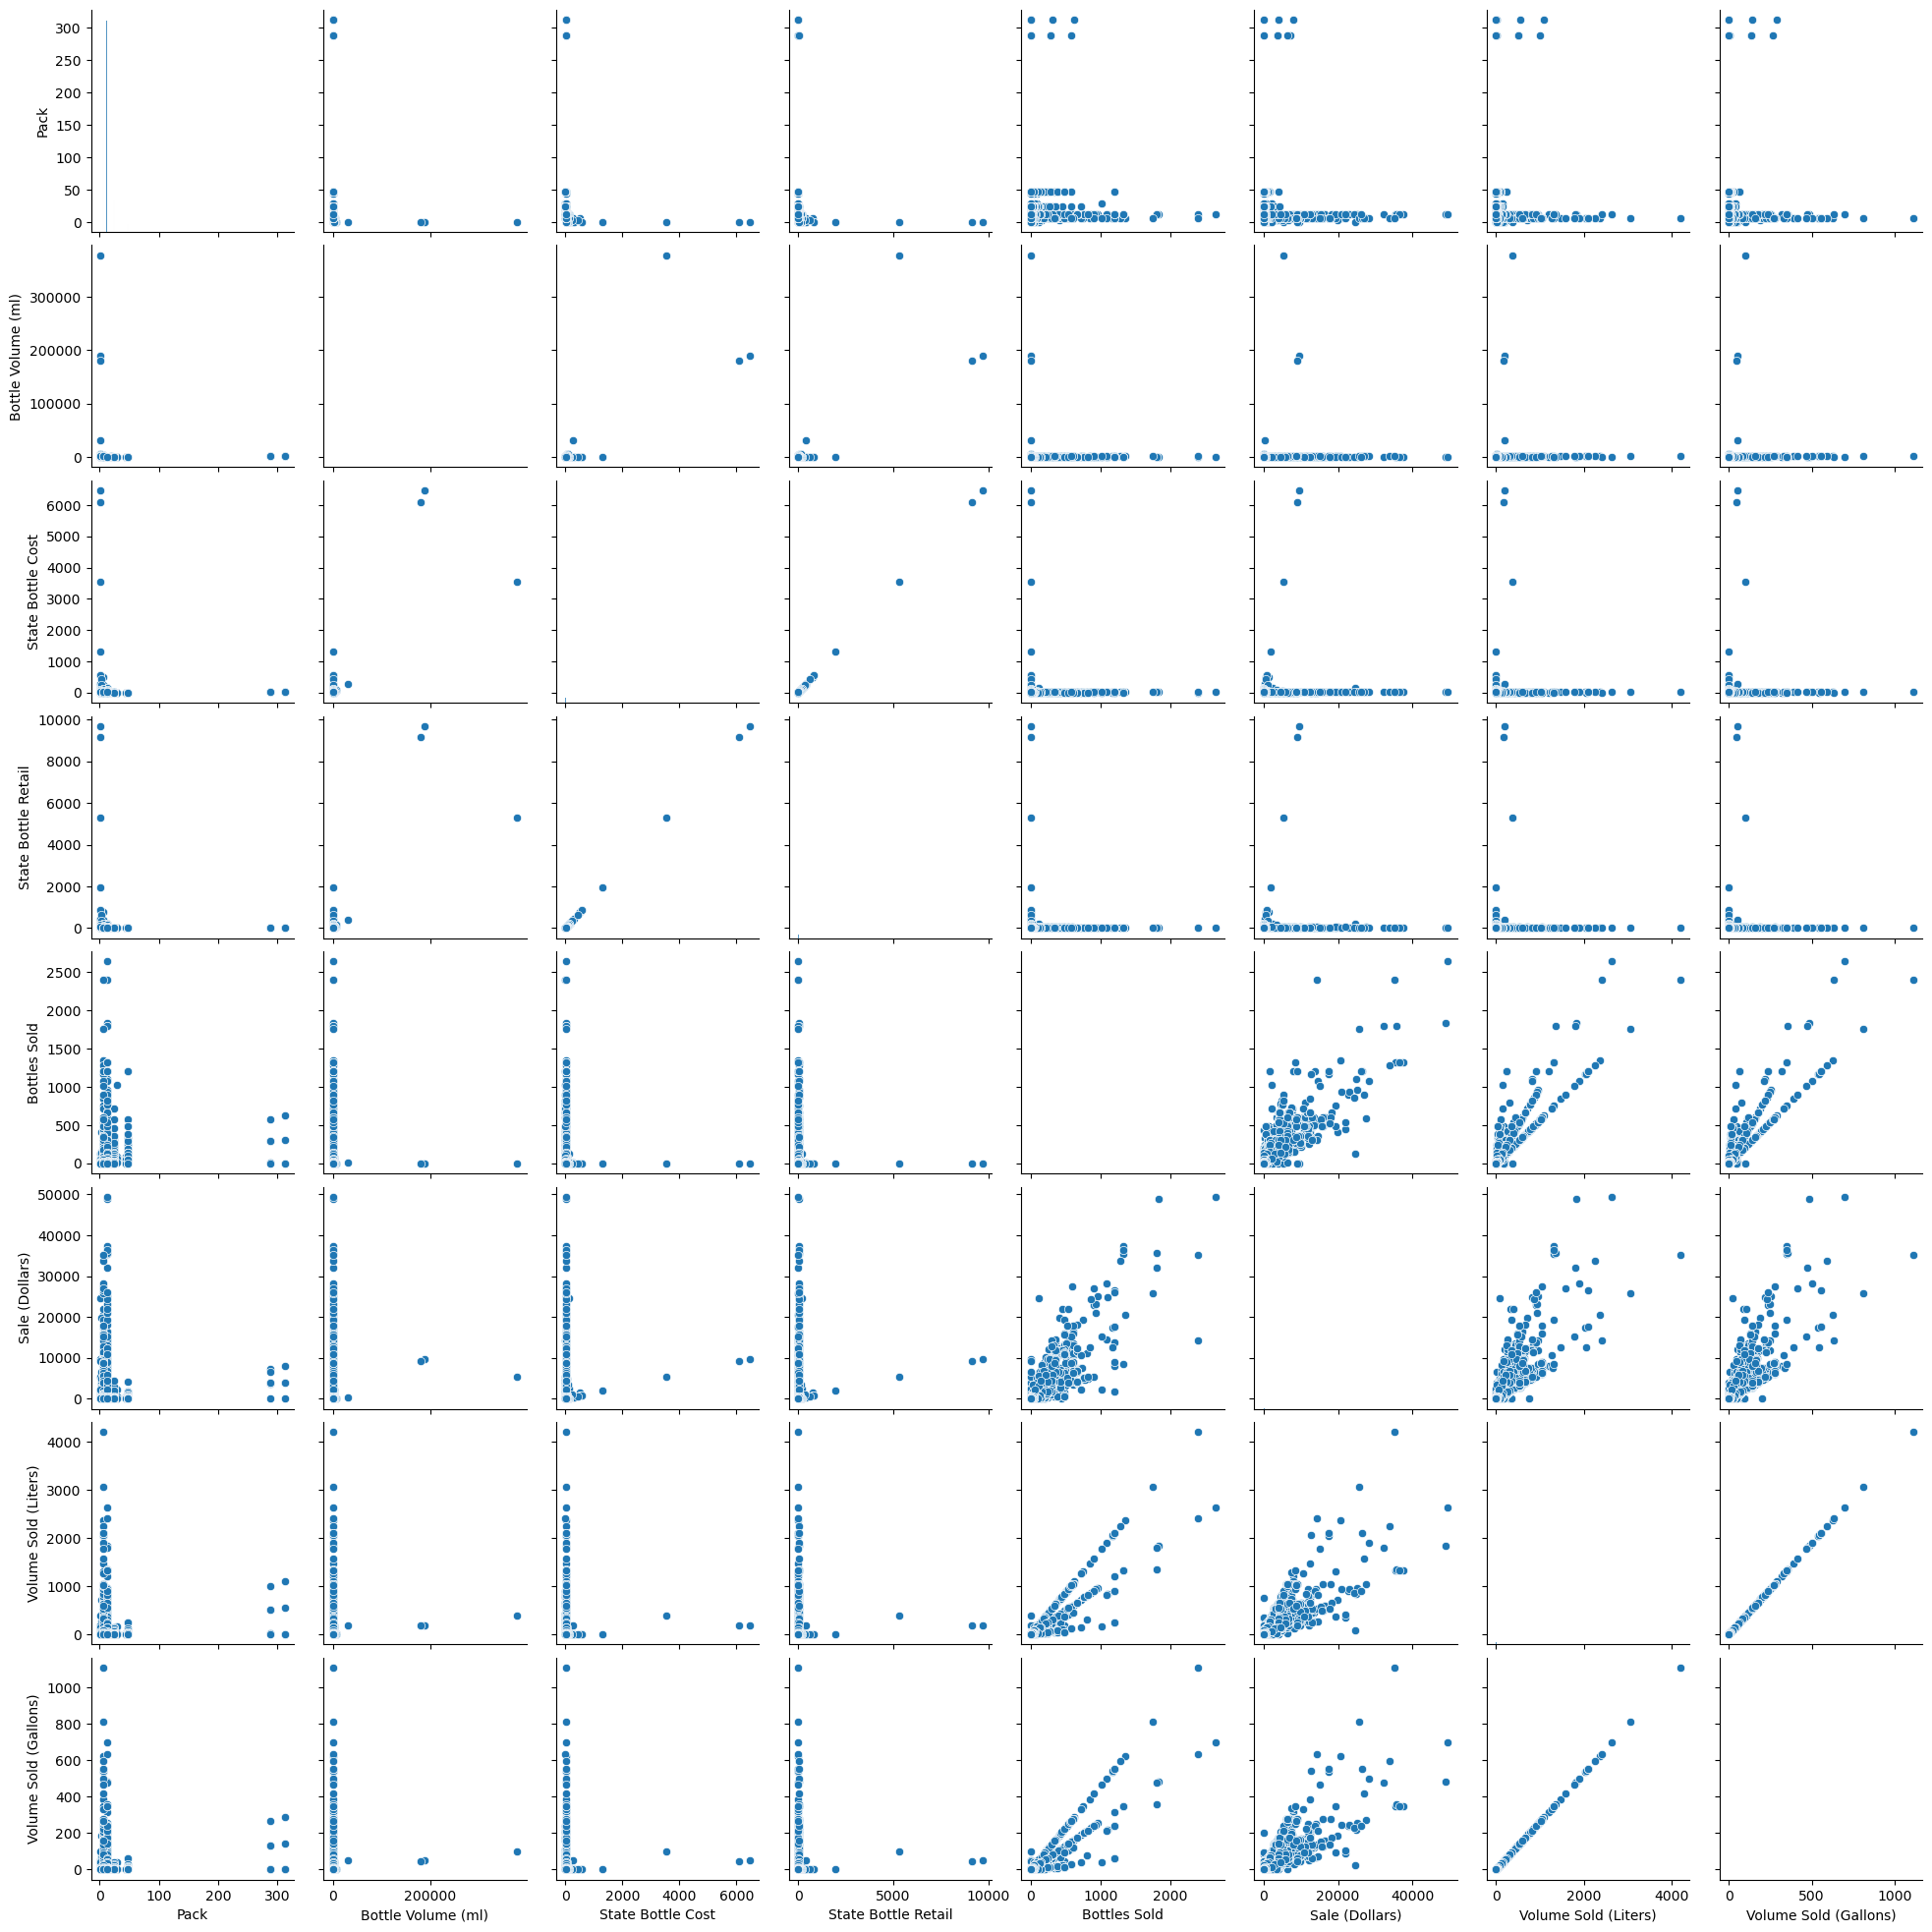

In [29]:
pair_plot = sns.pairplot(sub_sample)

Here we can see that there are some huge outlieres in most of our data. This is really good know, since we might want to exclude those outliers in further analysis. Interesting correlations are the same than before in the heat map. But now we have a better understanding how our correlation spreads and it sort of does it in a cheme.  
Bottles Sold and Volume Sold for example speads out in lines, which makes sence, because there are often different types of volume a bottle has(eg 500ml or 1000ml).
Sale and Volumne Sold spreads out in some sort of lines too but just more unregular. I can't explain this to myself right now, thats why it might be interesting for further analysis.

### categorial plot
variable used: Sale (Dollars)

In [38]:
# creating subset to get usable output, otherwise outlier make the result useless
cat_sub = sub[sub['Sale (Dollars)'] < 500]

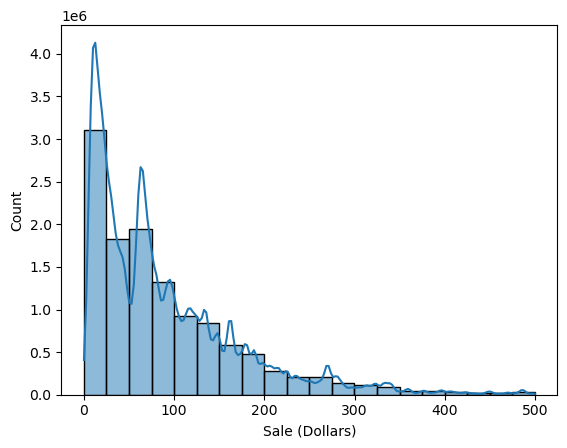

In [41]:
sales_count_hist_ExcludingOutlier = sns.histplot(cat_sub['Sale (Dollars)'], bins = 20, kde = True)

In [42]:
# export visualization
sales_count_hist_ExcludingOutlier.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_count_hist_ExcludingOutlier.png'))

The readable result is that most sales are made under 150 dollars.

### Questions answered
Are there any correlations between the variables?  
Answer: Yes there are correlations:  
- State Bottle Cost <==> State Bottle Retail [strong correlation]
- Bottles Sold <==> Volume Sold (Liters) [strong correlation]
- Sale (Dollars) <==> Volumne Sold (Liters) [strong correlation]  

### hypothesis
With a rising bottle price less bottles are getting sold.